In [ ]:
import os
os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')

from langchain_groq import ChatGroq

model = ChatGroq(model='qwen/qwen3-32b')

response = model.invoke("Hello, what is color of parrot?")

print(response)



content="<think>\nOkay, the user is asking about the color of a parrot. Hmm, parrots come in a lot of different colors, right? So I need to mention that they have vibrant colors. But wait, maybe they want specific examples. Let me think—common colors like green, blue, red, yellow... Oh, and some have multiple colors.\n\nWait, should I mention specific species? Like macaws or cockatiels? That might help illustrate the variety. Also, maybe explain why they have such bright colors. Oh right, it's for attracting mates or blending in with their environment. Wait, in the rainforest canopy, bright colors might actually help them stand out for communication, not just blending. That's an important point.\n\nI should also note that the color can vary by species. Maybe list some examples with their colors. Also, some parrots have iridescent feathers that change color when viewed from different angles. That's a cool detail to include.\n\nBut the user might just want a simple answer. Should I start

In [9]:
import os

os.environ['TAVILY_API_KEY'] = os.getenv('TAVILY_API_KEY')

from langchain_tavily import TavilySearch
search_tool = TavilySearch(
    max_results=5,
    topic='general'
)

search_tool.invoke("What is the capital of India?")



{'query': 'What is the capital of India?',
 'response_time': 0.85,
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.usatoday.com/story/news/world/2023/05/24/what-is-the-capital-of-india/70195720007/',
   'title': 'What is the capital of India? States and union territories explained.',
   'content': "# What is the capital of India? About 1.4 billion people live in India, and the country is predicted to top China as the world’s most populous country by mid-2023, the United Nations reports. The U.S. is third in line for the largest population by country but it's way behind China and India at about 335 million people. ## What is the capital of India? The capital of India is New Delhi, located in the north-central part of the country to the west of the Yamuna River. When the national government achieved independence in 1947, New Delhi became the capital. Mumbai, the state capital of Maharashtra, is often considered the financial capital of Indi

In [10]:
from langchain.tools import tool

@tool('calculator', description='Useful for when you need to answer questions about math or numbers.')
def calc(expression: str) -> str:
    """Evaluate mathematical expression"""
    return str(eval(expression))

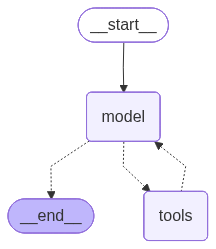

In [12]:
from langchain.agents import create_agent

agent = create_agent(
    model = model,
    tools=[search_tool, calc],
)

agent

In [15]:
user_input = "What is the current ai news for anthropic and then calculate 60 + 9"

for step in agent.stream({"messages": user_input},stream_mode="values"):
    step["messages"][-1].pretty_print()
    

================================ Human Message =================================

What is the current ai news for anthropic and then calculate 60 + 9
================================== Ai Message ==================================
Tool Calls:
  tavily_search (jt31b00fz)
 Call ID: jt31b00fz
  Args:
    query: current AI news about Anthropic
    search_depth: advanced
    time_range: week
  calculator (2xr0t5a5h)
 Call ID: 2xr0t5a5h
  Args:
    expression: 60 + 9
================================= Tool Message =================================
Name: calculator

69
================================== Ai Message ==================================

**Current AI News About Anthropic:**

1. **Security Breakthrough**  
   Anthropic's latest AI model identified over 500 previously unknown high-severity security flaws in open-source libraries with minimal prompting ([Reddit](https://www.reddit.com/r/Futurology/comments/1r5pe1a/anthropics_latest_ai_model_has_found_more_than/)).

2. **Pentagon Dispu

In [25]:
agent.invoke({"messages":"6 / 3 + 7"})["messages"][-1].content


'The result of the calculation $ \\frac{6}{3} + 7 $ is **9**. \n\n**Steps:**\n1. **Division first:** $ 6 \\div 3 = 2 $\n2. **Addition:** $ 2 + 7 = 9 $\n\nFinal answer: **9**.'